# FUNCTION to help in plotting, preprocessing or building features

In [3]:
import csv
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.ticker as MT
import matplotlib.lines as L
import matplotlib.cm as CM
from matplotlib import cm
import matplotlib.colors as C
import matplotlib.patches as PA
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import pickle 
from tol_colors import tol_cmap
import calendar
import os
from datetime import datetime, timedelta


plt.close('all')
plt.style.use('default')
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 14})
start = 0.0
stop = 1.0
number_of_lines= 10
cm_subsection = np.linspace(start, stop, number_of_lines) 
colors = [ cm.hsv(x) for x in cm_subsection ]

cmap = tol_cmap('rainbow_discrete', 10)
colors = cmap(1.0)
colors = [ cmap(x) for x in cm_subsection ]


LEGEND_FONT_SIZE = 22
AXIS_FONT_SIZE = 22
TICKS_FONT_SIZE = 16
LINE_WIDTH = 3.0


In [4]:
def plot_ts(attr, year_start, year_end = None):
    fig= plt.figure(figsize=(15,8))
    axes= fig.add_axes([0.1,0.1,0.8,0.8])
    axes.set_xlabel('Time', fontsize=AXIS_FONT_SIZE)
    #axes.set_ylabel(attr + ' ' + str(dataset_number) + ' [msc] - ' + str(year_start), fontsize=AXIS_FONT_SIZE)
    axes.tick_params(labelsize=TICKS_FONT_SIZE)
    
    uniq, index = np.unique(data[(data['water_year'] == year_start)]["month"], return_index=True)
    uniq = uniq[index.argsort()]
    
    if year_end is None:
        
        axes.plot(range(1,366,1), data[(data['water_year'] == year_start)][attr].values)
        axes.set_xticks(np.arange(0,360,30))
        axes.set_xticklabels(uniq)
    
    else:

        cmap = plt.get_cmap('Blues')

        newcmap = matplotlib.colors.ListedColormap(cmap(np.linspace(0.35, 0.99, year_end - year_start)))


        for i,y in enumerate(range(start_year, end_year + 1)):
            axes.plot(range(1,366,1) ,data[(data['water_year'] == y)][attr], c = newcmap(i), alpha = 1)

        norm = matplotlib.colors.Normalize(vmin=year_start,vmax=year_end)
        sm = plt.cm.ScalarMappable(cmap=newcmap, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace(year_start, year_end, year_end - year_start + 1), 
                     boundaries=np.arange(year_start,year_end))
        axes.set_xticks(np.arange(0,360,30))
        axes.set_xticklabels(uniq)

    
    plt.show()  
    
    
def plot_hydro(year_start, year_end = None):
    fig= plt.figure(figsize=(17,10))
    axes= fig.add_axes([0.1,0.1,0.8,0.8])
    axes.set_xlabel('Time', fontsize=AXIS_FONT_SIZE)
    axes.set_ylabel("Hydro" + ' ' + str(dataset_number) + ' [msc] - ' + str(year_start), fontsize=AXIS_FONT_SIZE)
    axes.tick_params(labelsize=TICKS_FONT_SIZE)
    
    uniq, index = np.unique(data[(data['water_year'] == year_start)]["month"], return_index=True)
    uniq = uniq[index.argsort()]
    
    if year_end is None:
        
        axes.plot(range(1,366,1), data[(data['water_year'] == year_start)]["storage"].values * data[(data['water_year'] == year_start)]["outflow"].values)
        
        axes.set_xticks(np.arange(0,360,30))
        axes.set_xticklabels(uniq)
    
    else:

        cmap = plt.get_cmap('Blues')

        newcmap = matplotlib.colors.ListedColormap(cmap(np.linspace(0.35, 0.99, year_end - year_start)))


        for i,y in enumerate(range(start_year, end_year + 1)):
            axes.plot(data[(data['water_year'] == y)]["n_day"] ,data[(data['water_year'] == y)]["storage"] * data[(data['water_year'] == y)]["outflow"], c = newcmap(i), alpha = 1)

        norm = matplotlib.colors.Normalize(vmin=year_start,vmax=year_end)
        sm = plt.cm.ScalarMappable(cmap=newcmap, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace(year_start, year_end, year_end - year_start + 1), 
                     boundaries=np.arange(year_start,year_end))
        axes.set_xticks(np.arange(0,360,30))
        axes.set_xticklabels(uniq)

    
    plt.show() 
    
    
def plot_med_mean(attr, q75 = None, q25 = None):

    %matplotlib inline

    fig= plt.figure(figsize=(14,8))
    axes= fig.add_axes([0.1,0.1,0.8,0.8])
    axes.set_xlabel('Time', fontsize=AXIS_FONT_SIZE)
    axes.set_ylabel('Mean '+ attr.replace("_", " "), fontsize=AXIS_FONT_SIZE)
    axes.tick_params(labelsize=TICKS_FONT_SIZE)

    start_year = data["water_year"].iloc[0] 
    #end_year = start_year + 15
    end_year = data["water_year"].iloc[-1]


    for i,y in enumerate(range(start_year, end_year + 1)):
        axes.plot(data[(data['water_year'] == y)]["n_day_water"] ,data[(data['water_year'] == y)][attr], c = "gray", alpha = 0.15)
        
    mean_= data.groupby('n_day_water').mean()[attr].values
    median_= data.groupby('n_day_water').median()[attr].values

    plt.plot(range(1,366,1), mean_, c = "r", linewidth = 3)
    plt.plot(range(1,366,1), median_, c = "b", linewidth = 3)
    if q75 is not None and q25 is not None:
        plt.fill_between(range(1,366,1), q25, q75, alpha=0.4)
        #plt.plot(range(1,366,1), q75, "--", c = "k", linewidth = 2)
        #plt.plot(range(1,366,1), q25, "--", c = "k", linewidth = 2)
        
    if attr == "storage":
        plt.plot(range(1,366,1), np.tile(max_storage,365), "--", c = "k", linewidth = 3)

    axes.set_xticks(np.arange(0,360,30))
    axes.set_xticklabels(uniq)

    plt.show()
    
    
def coeff_estimator(X, y, window_size):
    m = np.zeros(len(y))
    for i in range(len(y)):
        if i < (window_size):
            print(i)
            X_local = np.concatenate((np.tile(X.iloc[0], int(window_size - 1 - i)), X.iloc[:i+1]))
            y_local = np.concatenate((np.tile(y.iloc[0], int(window_size - 1 - i)), y.iloc[:i+1]))
        else:
            X_local = X.iloc[i - window_size + 1:i + 1].values
            y_local = y.iloc[i - window_size + 1:i + 1].values
        reg = LinearRegression().fit(X_local.reshape(-1, 1), y_local)
        m[i] = reg.coef_[0]
    return m

### FUNCTIONS to create a sigmoid or a mask over a certain function

In [ ]:
def mask_funct(inflection_1, inflection_2, max_q, left = 0, center = 1, right = 0):
    '''
    inflection_1: coordinate of first inflection point of the sigmoid
    inflection_2: coordinate of second inflection point of the sigmoid
    max_q: parameter to scale the sigmoid in order to be smooth with respect to the value assumed by the quantity
    increasing: boolean
    left: y-value of mask on the left side
    right: y-value of mask on the right side
       __
    __/  \__
    '''
    
    a = 50 / max_q
    limit = max_q / 7
    
    width_l = abs(center - left)
    width_r = abs(center - right)
    
    f_left = lambda x: (np.exp(a * (x - inflection_1)) / (1 + np.exp(a * (x - inflection_1)))) * width_l + left
    f_right = lambda x: (- np.exp(a * (x - inflection_2)) / (1 + np.exp(a * (x - inflection_2))) + 1) * width_r + right
    def func(x):
        sol = np.zeros_like(x, dtype= float)
        sol[x <= (inflection_1 + limit)] = f_left(x[x <= (inflection_1 + limit)])
        sol[x < (inflection_1 - limit)] = left
        sol[x > (inflection_1 + limit)] = f_right(x[x > (inflection_1 + limit)])
        sol[x > (inflection_2 + limit)] = right
        return sol
    
    return func

def sigmoid(inflection, max_q, left = 0, right = 1, increasing = True):
    '''
    inflection: coordinate of inflection point of the sigmoid
    max_q: parameter to scale the sigmoid in order to be smooth with respect to the values assumed by the quantity
    increasing: boolean
    left: y-value of sigmoid on the left side
    right: y-value of sigmoid on the right side
        ___
    ___/  
    '''
    
    a = 50 / max_q
    limit = max_q / 5
    
    width = abs(left - right)
    
    if increasing:
        f = lambda x: ( np.exp(a * np.clip(x - inflection, - limit, limit)) /
        (1 + np.exp(a * np.clip(x - inflection, - limit, limit))) ) * width + left
    else:
        f = lambda x: (- np.exp(a * np.clip(x - inflection, - limit, limit)) / 
        (1 + np.exp(a * np.clip(x - inflection,  - limit, limit))) + 1 ) * width + right
    def func(x):
        return f(x)
    
    return func

## FUNCTION to preprocess data and uniform it

In [7]:
def preprocess(data):
    
    data = data[["date", "outflow", "storage", "water_year"]]
    data['date'] = pd.to_datetime(data['date'])
    data['day'] = data['date'].dt.day
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data["hydro"] = data['storage'].values * data['outflow'].values
    
    data["n_day"] = np.zeros(len(data["date"]))

    for i in range(len(data["date"])):
        if calendar.isleap(data["date"].iloc[i].year) and data["date"].iloc[i].timetuple().tm_yday > 59: 
            data["n_day"].iloc[i] = data["date"].iloc[i].timetuple().tm_yday - 1
        else:
            data["n_day"].iloc[i] = data["date"].iloc[i].timetuple().tm_yday

    data["n_day_water"] = data["n_day"]

    data.loc[(data['month'] == 10) | (data['month'] == 11) | (data['month'] == 12), "n_day_water"] -= 273 
    data.loc[(data['month'] != 10) & (data['month'] != 11) & (data['month'] != 12), "n_day_water"] += (365 - 273)
    
    start_year = data['water_year'].iloc[0]

    uniq, index = np.unique(data[(data['water_year'] == start_year)]["month"], return_index=True)
    uniq = uniq[index.argsort()]
    
    outlier_data = data["outflow"].values
    window_size = 9

    window_mean = np.zeros_like(outlier_data)

    left_filler = [outlier_data[0]] * int(((window_size - 1) / 2))
    right_filler = [outlier_data[-1]] * int(((window_size - 1) / 2))

    outlier_data = np.concatenate((left_filler, outlier_data, right_filler))
    
    for i in range(len(window_mean)):
        window_mean[i] = np.nanmedian(outlier_data[i:i + window_size])
    
    prova = data["outflow"]
    data["outflow"] = window_mean
    
    res = window_mean - outlier_data[int(((window_size - 1) / 2)):-int(((window_size - 1) / 2))]
    res_nan = res[~np.isnan(res)]
    res_nan_not0 = res_nan[res_nan != 0]

    q_10 = np.quantile(res_nan_not0, 0.1)
    q_90 = np.quantile(res_nan_not0, 0.9)

    IQR = q_90 - q_10

    outlier_mask = np.zeros(len(res), dtype = bool)
    outlier_mask[abs(res) > 3 * IQR] = 1

    for i in range(len(outlier_mask)):
        if outlier_mask[i]:
            total_var = abs(data["storage"].iloc[i-1] - data["storage"].iloc[i]) + abs(data["storage"].iloc[i+1] - data["storage"].iloc[i]) 
            delta = abs(data["storage"].iloc[i-1] - data["storage"].iloc[i+1])

            if total_var > 3 * delta:
                data["storage"].iloc[i] = np.NaN

    data["storage"] = data["storage"].interpolate(method='spline', order = 3)
    data["outflow"] = data["outflow"].interpolate(method='spline', order = 3)
    
    return data

## PLOTTING FUNCTION: it allows to visualize the time series over the water year, the mean (red), the median (blue) and the maximum storage as registered in GRanD

In [5]:
def plot_med_mean_double(attr1, attr2, q75 = None, q25 = None):

    %matplotlib inline

    #plt.figure(figsize=(14,16))
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,16))
    #axes= fig.add_axes([0.1,0.1,0.8,0.8])
    ax1.set_xlabel('Time', fontsize=AXIS_FONT_SIZE)
    ax1.set_ylabel('Mean '+ attr1.replace("_", " "), fontsize=AXIS_FONT_SIZE)
    ax1.tick_params(labelsize=TICKS_FONT_SIZE)

    start_year = data["water_year"].iloc[0] 
    #end_year = start_year + 15
    end_year = data["water_year"].iloc[-1]


    for i,y in enumerate(range(start_year, end_year + 1)):
        ax1.plot(data[(data['water_year'] == y)]["n_day_water"] ,data[(data['water_year'] == y)][attr1], c = "gray", alpha = 0.15)
        
    mean_= data.groupby('n_day_water').mean()[attr1].values
    median_= data.groupby('n_day_water').median()[attr1].values

    ax1.plot(range(1,366,1), mean_, c = "r", linewidth = 3)
    ax1.plot(range(1,366,1), median_, c = "b", linewidth = 3)
    if q75 is not None and q25 is not None:
        plt.fill_between(range(1,366,1), q25, q75, alpha=0.4)
        #plt.plot(range(1,366,1), q75, "--", c = "k", linewidth = 2)
        #plt.plot(range(1,366,1), q25, "--", c = "k", linewidth = 2)
        
    if attr1 == "storage":
        ax1.plot(range(1,366,1), np.tile(max_storage,365), "--", c = "k", linewidth = 3)

    ax1.set_xticks(np.arange(0,360,30))
    ax1.set_xticklabels(uniq)
    
    ####
    
    ax2.set_xlabel('Time', fontsize=AXIS_FONT_SIZE)
    ax2.set_ylabel('Mean '+ attr2.replace("_", " "), fontsize=AXIS_FONT_SIZE)
    ax2.tick_params(labelsize=TICKS_FONT_SIZE)

    start_year = data["water_year"].iloc[0] 
    #end_year = start_year + 15
    end_year = data["water_year"].iloc[-1]


    for i,y in enumerate(range(start_year, end_year + 1)):
        ax2.plot(data[(data['water_year'] == y)]["n_day_water"] ,data[(data['water_year'] == y)][attr2], c = "gray", alpha = 0.15)
        
    mean_= data.groupby('n_day_water').mean()[attr2].values
    median_= data.groupby('n_day_water').median()[attr2].values

    ax2.plot(range(1,366,1), mean_, c = "r", linewidth = 3)
    ax2.plot(range(1,366,1), median_, c = "b", linewidth = 3)
    if q75 is not None and q25 is not None:
        plt.fill_between(range(1,366,1), q25, q75, alpha=0.4)
        #plt.plot(range(1,366,1), q75, "--", c = "k", linewidth = 2)
        #plt.plot(range(1,366,1), q25, "--", c = "k", linewidth = 2)
        
    if attr2 == "storage":
        plt.plot(range(1,366,1), np.tile(max_storage,365), "--", c = "k", linewidth = 3)
    
    if attr2 == "outflow":
        plt.plot(range(1,366,1), np.tile(np.mean(median_),365), "--", c = "k", linewidth = 3)

    ax2.set_xticks(np.arange(0,360,30))
    ax2.set_xticklabels(uniq)

    plt.show()

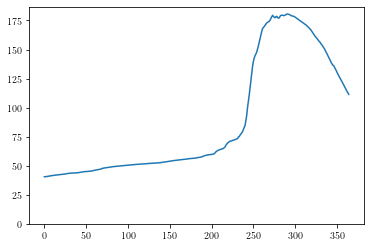

In [511]:
i = 16
plt.figure(10)
plt.plot(np.arange(0,365), data["storage"].iloc[i * 365: (i + 1) * 365])
plt.ylim(0, max_storage)
plt.show()

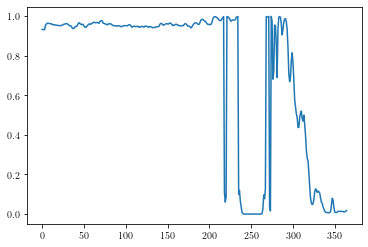

In [512]:
plt.plot(np.arange(0,365), mask_const[i * 365: (i + 1) * 365])

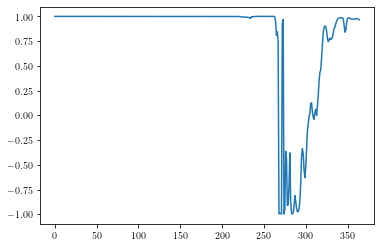

In [513]:
plt.plot(np.arange(0,365), mask_storage_high[i * 365: (i + 1) * 365])

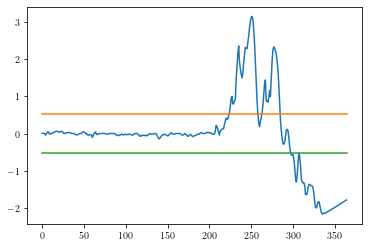

In [455]:
plt.figure(1)
plt.plot(np.arange(0,365), m[i * 365: (i + 1) * 365])
plt.plot(np.arange(0,365), np.ones(365) * threshold)
plt.plot(np.arange(0,365), - np.ones(365) * threshold)

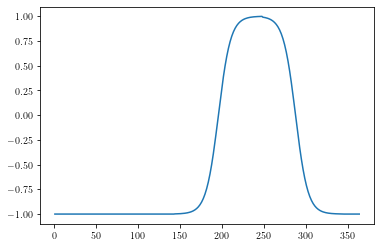

In [399]:
f_outflow = mask_funct(inflection_1 = start, inflection_2 = end, max_q = 365,
                     left = -1, center = 1, right = -1)
plt.plot(np.arange(1,365), f_outflow(np.arange(1,365)))


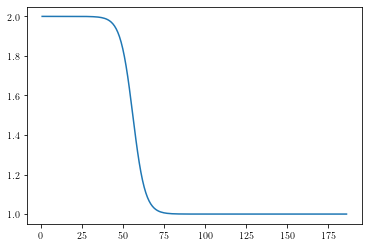

In [469]:
sig_storage_high = sigmoid(inflection = 0.7 * max_storage, max_q = max_storage, left = 1, right = - 1, increasing = False)
mask_storage_high = sig_storage_high(data["storage"])
mask_storage_low = sig_storage_low(data["storage"])
plt.plot(np.arange(1,int(max_storage)), sig_storage_low(np.arange(1,int(max_storage))))

mask_storage_high = np.ones(len(days)) * (1 - mask_const) + mask_storage_high * (mask_const)


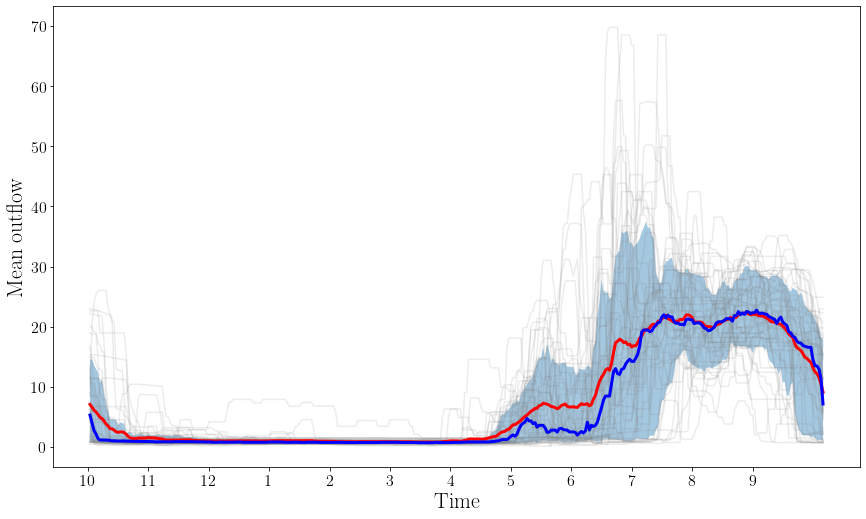

In [490]:
plot_med_mean("outflow", q25_demand,q75_demand)

In [396]:
gamma = 0.997

disc_factor = np.power(gamma * np.ones(365),range(365))

shape_reward_features = reward_features[:, np.newaxis, :].reshape(-1,365,3)

discounted_return = disc_factor[np.newaxis,:,np.newaxis] * shape_reward_features

discounted_return.sum(axis=1).mean(axis=0)

array([   0.36276199,   -3.82828473, -130.76970441])

In [ ]:
np.sum(reward_first, axis = 0)

In [ ]:
num_regimes = np.arange(1, 7, dtype=int)
irl_alg_names = ['Sigma-Girl-Corrected']  
data = []
with open(logs_dir  + 'res_non_stationary.pickle', 'rb') as f:
    d = pickle.load(f)
    data.append(d)

In [ ]:
def plotSimplex(points, fig=None, 
                vertexlabels=['1','2','3'],
                **kwargs):
    """
    Plot Nx3 points array on the 3-simplex 
    (with optionally labeled vertices) 
    
    kwargs will be passed along directly to matplotlib.pyplot.scatter    
    Returns Figure, caller must .show()
    """
    
    if(fig == None):        
        fig = plt.figure(figsize=(3, 3))
    # Draw the triangle
    l1 = L.Line2D([0, 0.5, 1.0, 0], # xcoords
                  [0, np.sqrt(3) / 2, 0, 0], # ycoords
                  color='gray', linewidth=1)
    
    fig.gca().add_line(l1)
    fig.gca().xaxis.set_major_locator(MT.NullLocator())
    fig.gca().yaxis.set_major_locator(MT.NullLocator())
    plt.axis('off')
    # Draw vertex labels
    fig.gca().text(-0.2, -0.15, vertexlabels[0])
    fig.gca().text(0.75, -0.15, vertexlabels[1])
    fig.gca().text(0.4, np.sqrt(3) / 2 + 0.05, vertexlabels[2])
    # Project and draw the actual points
    projected = projectSimplex(points)
    plt.scatter(projected[:,0], projected[:,1], **kwargs)              
    # Leave some buffer around the triangle for vertex labels
    fig.gca().set_xlim(-0.2, 1.2)
    fig.gca().set_ylim(-0.2, 1.2)

    return fig    

def projectSimplex(points):
    """ 
    Project probabilities on the 3-simplex to a 2D triangle
    
    N points are given as N x 3 array
    """
    # Convert points one at a time
    tripts = np.zeros((points.shape[0],2))
    for idx in range(points.shape[0]):
        # Init to triangle centroid
        x = 1.0 / 2
        y = 1.0 / (2 * np.sqrt(3))
        # Vector 1 - bisect out of lower left vertex 
        p1 = points[idx, 0]
        x = x - (1.0 / np.sqrt(3)) * p1 * np.cos(np.pi / 6)
        y = y - (1.0 / np.sqrt(3)) * p1 * np.sin(np.pi / 6)
        # Vector 2 - bisect out of lower right vertex  
        p2 = points[idx, 1]  
        x = x + (1.0 / np.sqrt(3)) * p2 * np.cos(np.pi / 6)
        y = y - (1.0 / np.sqrt(3)) * p2 * np.sin(np.pi / 6)        
        # Vector 3 - bisect out of top vertex
        p3 = points[idx, 2]
        y = y + (1.0 / np.sqrt(3) * p3)
      
        tripts[idx,:] = (x,y)

    return tripts

In [ ]:
np.array([d['Sigma-Girl-Corrected'] for d in data[2]['irl_weights']])

In [ ]:
points = np.array([data[0]['irl_weight']['Sigma-Girl-Corrected']])
fig = plotSimplex(points, s=100, vertexlabels=['Demand', 'Flooding', 'Dried'], c=colors[:len(points)])
fig.savefig(logs_dir + "triangle.pdf", bbox_inches='tight')